# StackGP.evaluateGPModel
```{python}
StackGP.evaluateGPModel(model,data)
```

`evaluateGPModel` is a StackGP function that evaluates a GP model with the supplied data. 

The function expects 2 arguments: _model_ and _data_

The arguments are described below: 

* **model**: A StackGP model. 
* **data**: Input data for the model to be evaluated at. 

---

First we need to load in the necessary packages

In [1]:
import StackGP as sgp
import numpy as np

## Overview

### Evaluate a model

Here we generate a random model with up to 4 variables, the default operator set, the default constant set, and a maxSize of 10. 

In [21]:
randomModel=sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 10)

We can display the random model below

In [22]:
sgp.printGPModel(randomModel)

-7.38905609893065 + 1/x0

Now lets generate some data. Here we generate 4 features with 100 points within each feature. Notice how the data is row-oriented such that each feature is an entire row or sublist. 

In [23]:
inputData = np.random.rand(4, 100)

Now we can evalute the model using the generated data. 

In [24]:
response= sgp.evaluateGPModel(randomModel, inputData)

We can visualize the response. 

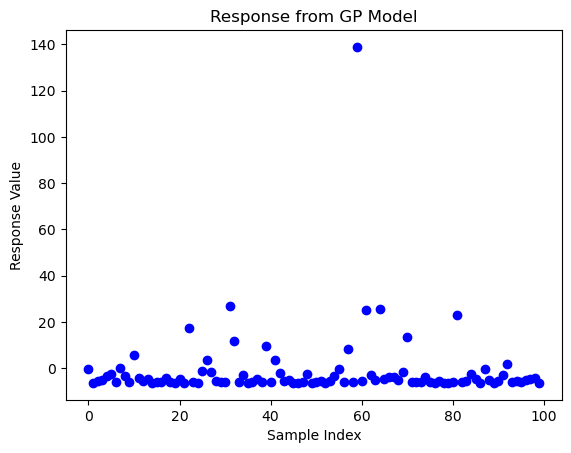

In [25]:
import matplotlib.pyplot as plt
plt.plot(response, marker='o', linestyle="", color='b')
plt.title("Response from GP Model")
plt.xlabel("Sample Index")
plt.ylabel("Response Value")
plt.show()

---
---

## Examples

This section showcases how each of the different arguments can be used with the evaluateGPModel function. 

---

### Evaluating at a Single Point

We may be interested in the response of a model at a specific point. In this case we can just supply the set of input features as a numpy array. First we need a model though, so lets generate a random one. 

In [35]:
randomModel=sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 100)
sgp.printGPModel(randomModel)

1/(-x2 - sqrt(3)/3 + 0.937627925986634)

Now we can generate a data point. The model we generated expects 4 features, so we will generate a numpy array with 4 values. 

In [36]:
inputPoint= np.array([0.5, 0.2, 0.8, 0.2])

Now we can evaluate the model using the data point we just created. 

In [37]:
sgp.evaluateGPModel(randomModel, inputPoint)

-2.2741623559900934

### Evaluating with a Dataset

We may be interested in the response of a model across an entire dataset. If this is the case, we can supply a numpy array of feature vectors, where each feature vector contains all the values for a specific feature. 

First lets generate a model. 

In [40]:
randomModel=sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 20)
sgp.printGPModel(randomModel)

0.276920334099909 + 0.0938253591886297/(x0**2 + x1)**2

Now lets generate a numpy array of feature vectors. Here we generate a numpy array containing 4 feature vectors each with 10 values. 

In [42]:
inputData = np.random.rand(4, 10)
inputData

array([[0.49712253, 0.93590783, 0.91319582, 0.19120253, 0.78402521,
        0.2814146 , 0.15795648, 0.76337467, 0.95434675, 0.5223276 ],
       [0.06192474, 0.86111942, 0.80432537, 0.24855519, 0.5822506 ,
        0.04048337, 0.33928313, 0.1781826 , 0.13069608, 0.82257494],
       [0.02629974, 0.42413749, 0.33624588, 0.47189234, 0.04738005,
        0.62922922, 0.88555695, 0.46400262, 0.93984953, 0.19572002],
       [0.74567817, 0.05183589, 0.93540692, 0.21125394, 0.75095729,
        0.58840774, 0.46630557, 0.48712916, 0.6618613 , 0.49968603]])

Now we can evaluate the model using the entire dataset. 

In [43]:
response = sgp.evaluateGPModel(randomModel, inputData)
response

array([1.25922711, 0.30801595, 0.31187932, 1.43112911, 0.34240974,
       6.82772806, 0.98415044, 0.43896631, 0.36342181, 0.35511442])